# Naive Bayes Model

In [149]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [150]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
import seaborn as sns

from nltk import FreqDist

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import sys
sys.path.append("../")

from src.data import get_data

In [151]:
X, y , X_test = get_data()
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

In [152]:
vectorizer = TfidfVectorizer(max_features=500) 

X_train_dtm = vectorizer.fit_transform(X_train['clean_text'])
X_val_dtm = vectorizer.transform(X_val['clean_text'])
X_test_dtm = vectorizer.transform(X_test['clean_text'])
print(X_train_dtm.shape, X_val_dtm.shape, X_test_dtm.shape)

(5709, 500) (1904, 500) (3263, 500)


In [153]:
clf = GaussianNB()
clf.fit(X_train_dtm.toarray(), y_train)

GaussianNB()

In [154]:
y_val_prob = clf.predict_proba(X_val_dtm.toarray())[:,1]
y_val_pred = np.where(y_val_prob > 0.7, 1, 0)

<Figure size 1000x700 with 0 Axes>

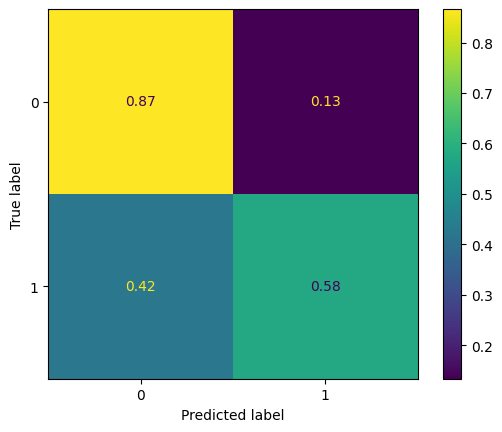

In [155]:
plt.figure(figsize = (10,7))
cm = confusion_matrix(
    y_val, 
    y_val_pred, 
    labels=clf.classes_,
    normalize='true',
)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=clf.classes_,
)
disp.plot()
plt.show()

In [156]:
y_val_pred.sum()/len(y_val_pred)

0.3224789915966387

In [157]:
X_test['target'] = clf.predict(X_test_dtm.toarray())
submission_set = X_test[['id', 'target']]
submission_set.to_csv('../data/submissions/02-naive-bayes-model.csv', index=False)

In [162]:
!kaggle competitions submit -c nlp-getting-started -f ../data/submissions/02-naive-bayes-model.csv -m "naive bayes tfidf vectoriser 500 feats"

100%|██████████████████████████████████████| 22.2k/22.2k [00:02<00:00, 11.3kB/s]
Successfully submitted to Natural Language Processing with Disaster Tweets

In [159]:
# Get example of misclassifications
X_val['prediction'] = clf.predict(X_val_dtm.toarray())
X_val['target'] = y_val

misclassified = X_val[X_val['prediction'] != X_val['target']].reset_index(drop=True)

In [160]:
misclassified.head()

,id,keyword,location,text,clean_text,prediction,target
0,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,new weapon cause destruction,0,1
1,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,dt georgegalloway rt galloway4mayor col police...,0,1
2,2538,collision,NaN,my favorite lady came to our volunteer meeting...,favorite lady came volunteer meeting hopefully...,0,1
3,2611,crashed,NaN,@brianroemmele UX fail of EMV - people want to...,brianroemmele ux fail emv people want insert r...,0,1
4,6254,hijacking,"Athens,Greece",The Murderous Story Of AmericaÛªs First Hijac...,murderous story first hijacking,0,1


In [161]:
idx = 5
print(f"prediction: {misclassified.loc[idx, 'prediction']} \n target: {misclassified.loc[idx, 'target']} \n Original text: {misclassified.loc[idx, 'text']} \n Processed text: {misclassified.loc[idx, 'clean_text']}")

prediction: 0 
 target: 1 
 Original text: AKILAH WORLD NEWS Cop pulls man from car to avoid this ... http://t.co/Vn2Fnmy7li 
 Processed text: akilah world news cop pull man car avoid
